In [2]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from glob import glob

%load_ext autoreload
%autoreload 2

In [3]:
def icon_time_to_date_time(x: float) -> pd.Timestamp:
    a = int(x // 1)
    b = x % 1 * 24*60*60
    return pd.to_datetime(a, format='%Y%m%d') + pd.DateOffset(seconds=b)

In [4]:
# ds = xr.open_dataset('/work/bd1179/b309215/icon-a-ml/build_intel_rterrtmgp/experiments_project/heuer_atm_amip_R2B4_vlvl60_baseline_1979/heuer_atm_amip_R2B4_vlvl60_baseline_1979_atm_2d_inst_ml_19790201T000000Z.nc')
ds = xr.open_dataset('/work/bd1179/b309215/icon-a-ml/build_intel_rterrtmgp/experiments_project/heuer_atm_amip_R2B4_vlvl60_baseline_pr1H/heuer_atm_amip_R2B4_vlvl60_baseline_pr1H_atm_2d_inst_ml_20100201T000000Z.nc')

In [5]:
for da_name in ds:
    print(da_name, ': ', ds[da_name].long_name)

orog :  surface altitude
ps :  surface pressure
psl :  mean sea level pressure
cosmu0 :  cosine of the zenith angle for rad. heating
rsdt :  toa incident shortwave radiation
rsut :  toa outgoing shortwave radiation
rsutcs :  toa outgoing clear-sky shortwave radiation
rlut :  toa outgoing longwave radiation
rlutcs :  toa outgoing clear-sky longwave radiation
rsds :  surface downwelling shortwave radiation
rsdscs :  surface downwelling clear-sky shortwave radiation
rlds :  surface downwelling longwave radiation
rldscs :  surface downwelling clear-sky longwave radiation
rsus :  surface upwelling shortwave radiation
rsuscs :  surface upwelling clear-sky shortwave radiation
rlus :  surface upwelling longwave radiation
ts :  surface temperature
sic :  fraction of ocean covered by sea ice
sit :  sea ice thickness
albedo :  surface albedo
clt :  total cloud cover
prlr :  large-scale precipitation flux (water)
prls :  large-scale precipitation flux (snow)
prcr :  convective precipitation flux (

In [6]:
# ds_grid = xr.open_dataset('/work/bd1179/b309215/icon-a-ml/build_intel_no_openmp/experiments_project/my_atm_amip_R2B5_reference/icon_grid_0019_R02B05_G.nc')
ds_grid = xr.open_dataset('/work/bd1179/b309215/icon-a-ml/build_intel_rterrtmgp/experiments_project/heuer_atm_amip_R2B4_vlvl60_baseline_pr1H/icon_grid_0013_R02B04_G.nc')

In [7]:
files_2d_ref = sorted(glob('/work/bd1179/b309215/icon-a-ml/build_intel_rterrtmgp/experiments_project/heuer_atm_amip_R2B4_vlvl60_baseline_pr1H/heuer_atm_amip_R2B4_vlvl60_baseline_pr1H_atm_2d_inst_ml_*Z.nc'))
files_2d_alllonlat = sorted(glob('/work/bd1179/b309215/icon-a-ml/build_intel_rterrtmgp/experiments_project/heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0.54M_ncorr42_pr1H_fullml/heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0.54M_ncorr42_pr1H_fullml_atm_2d_inst_*Z.nc'))
files_2d_alllonlat_wpr = sorted(glob('/work/bd1179/b309215/icon-a-ml/build_intel_rterrtmgp/experiments_project/heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0.54M_ncorr42_pr1H_10p0_60p1_pinn385weight0.1_extra2d5fix/heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0.54M_ncorr42_pr1H_10p0_60p1_pinn385weight0.1_extra2d5fix_atm_2d_inst_*Z.nc'))
# files_2d_alllon_troplat = sorted(glob('/work/bd1179/b309215/icon-a-ml/build_intel_rterrtmgp/experiments_project/heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0.54M_ncorr42_fullml_1979_noise0.2/heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0.54M_ncorr42_fullml_1979_noise0.2_atm_2d_inst_*Z.nc'))
files_2d_alllon_troplat = sorted(glob('/work/bd1179/b309215/icon-a-ml/build_intel_rterrtmgp/experiments_project/heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0.54M_ncorr42_pr1H_10p0_70p1_pinn385weight0.1_extra2d5fix/heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0.54M_ncorr42_pr1H_10p0_70p1_pinn385weight0.1_extra2d5fix_atm_2d_inst_*Z.nc'))
# files_2d_alllon_troplat_wpr = sorted(glob('/work/bd1179/b309215/icon-a-ml/build_intel_rterrtmgp/experiments_project/heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0.54M_ncorr42_10p0_60p1_pinnweight0.1_1979_noise0.2_extra2d5fix/heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0.54M_ncorr42_10p0_60p1_pinnweight0.1_1979_noise0.2_extra2d5fix_atm_2d_inst_*Z.nc'))
files_2d_alllon_troplat_wpr = sorted(glob('/work/bd1179/b309215/icon-a-ml/build_intel_rterrtmgp/experiments_project/heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0.54M_ncorr42_pr1H_10p0_80p1_pinn385weight0.1_extra2d5fix/heuer_atm_amip_R2B4_vlvl60_nonconservative_nn0.54M_ncorr42_pr1H_10p0_80p1_pinn385weight0.1_extra2d5fix_atm_2d_inst_*Z.nc'))

len(files_2d_ref), len(files_2d_alllonlat), len(files_2d_alllonlat_wpr), len(files_2d_alllon_troplat), len(files_2d_alllon_troplat_wpr), 

(12, 12, 12, 12, 12)

In [8]:
sim_names = [
    'reference',
    'alllonlat',
    'alllonlat_wpr',
    'alllon_troplat',
    'alllon_troplat_wpr',
]

In [9]:
file_lists = [
    files_2d_ref,
    files_2d_alllonlat,
    files_2d_alllonlat_wpr,
    files_2d_alllon_troplat,
    files_2d_alllon_troplat_wpr,
]

In [10]:
def rad2degr(x):
    return x*180/np.pi

def plot_icon_tricolor(ax, clon_bnds, clat_bnds, vals, **kwargs):
    a = rad2degr(clon_bnds.flatten()[:])
    b = rad2degr(clat_bnds.flatten()[:])
    c = np.arange(clon_bnds.size).reshape(clon_bnds.shape)
    plot = ax.tripcolor(a,
                        b,
                        c,
                        vals,
                        **kwargs)
    
    return plot

In [11]:
def fix_periodicity_for_triplot(clon_bnds):
    '''
    Takes in clon bnds coordinate list and adds/subtracts 2pi
    to/from all points where one edge is with other sign
    '''
    mask = np.any(np.abs(np.diff(clon_bnds, axis=1)) > 4, axis=1)
    vert_sign_sum = np.sum(np.sign(clon_bnds), axis=1)
    pmask = np.sign(vert_sign_sum)[:,None] > np.sign(clon_bnds)
    pmask = pmask & mask[:,None]
    nmask = np.sign(vert_sign_sum)[:,None] < np.sign(clon_bnds)
    nmask = nmask & mask[:,None]

    clon_bnds[pmask] += 2*np.pi
    clon_bnds[nmask] -= 2*np.pi
    return clon_bnds

In [12]:
def calc_zonal_mean(ds, var, points=128, exponent=1):
    hist_opts = dict(bins=points, range=(-np.pi / 2, np.pi / 2))
    cells_per_bin, lat_bins = np.histogram(ds.clat, **hist_opts)
    lat_bins_c = (lat_bins[:-1] + lat_bins[1:] ) / 2
    varsum_per_bin, _ = np.histogram(ds.clat, weights=ds[var].isel(time=0)**exponent, **hist_opts)
    zonal_mean = varsum_per_bin / cells_per_bin
    return zonal_mean, lat_bins_c

def calc_zonal_mean_std(ds, var, points=128):
    mean_var, lat_bins_c = calc_zonal_mean(ds, var, points=points)
    mean_var_2, lat_bins_c = calc_zonal_mean(ds, var, points=points, exponent=2)
    return mean_var, np.sqrt(mean_var_2 - mean_var**2), lat_bins_c

In [13]:
def calc_global_mean_std(ds, var):
    mean_var = np.mean(ds[var].values * ds_grid.cell_area.values / ds_grid.cell_area.values.mean())
    mean_var_2 = np.mean(ds[var].values**2 * ds_grid.cell_area.values / ds_grid.cell_area.values.mean())
    return mean_var, np.sqrt(mean_var_2 - mean_var**2)

In [14]:
from scipy.ndimage import laplace

def calc_laplacian_variance(ds, var):
    # Apply the Laplacian operator
    laplacian = laplace(ds[var].values)
    # Compute the variance
    variance = laplacian.var()
    return variance

In [15]:
def calc_global_entropy(ds, var, range=None):
    marg = np.histogram(np.ravel(ds[var].values), bins = 100, range=range)[0]/ds[var].values.size
    marg = marg[marg > 0]
    entropy = -np.sum(np.multiply(marg, np.log2(marg)))
    return entropy

In [16]:
# timesteps = [6, int(15*24/4), int(30*24/4)]
# timesteps = ['19790201T060000Z', '19790205T000000Z', '19790301T000000Z']
# timesteps = ['19790201T060000Z', '19790201T182400Z', '19790301T060000Z']
timesteps = [0,2,11]
ds_list = []
# ds_latlon_list = []
used_files_list = []
for i,f_list in enumerate(file_lists):
    ds_list.append([])
    # ds_latlon_list.append([])
    for j,timestep in enumerate(timesteps):
        print(timestep)
        used_files_list.append(f_list[timestep])

        ds = xr.open_dataset(f_list[timestep])
        ds['clon_bnds'] = ds_grid['clon_vertices'].rename({'cell': 'ncells'})
        ds['clat_bnds'] = ds_grid['clat_vertices'].rename({'cell': 'ncells'})

        ds = ds.assign_coords({
            'clon_bnds': ds['clon_bnds'],
            'clat_bnds': ds['clat_bnds']}
        )
        ds_list[i].append(ds)
        # ds_latlon_list[i].append(xr.open_dataset(f_list[timestep].replace('.nc', '_0.9latlon.nc')))
        # ds_latlon_list[i].append(xr.open_dataset(f_list[timestep].replace('.nc', '_gauss101.nc')))

0
2
11
0
2
11
0
2
11
0
2
11
0
2
11


Maximum zonal mean plus std:  64.90220251583457
Min val / Max val:  0.34706122 75.73182


  0%|          | 0/15 [00:00<?, ?it/s]

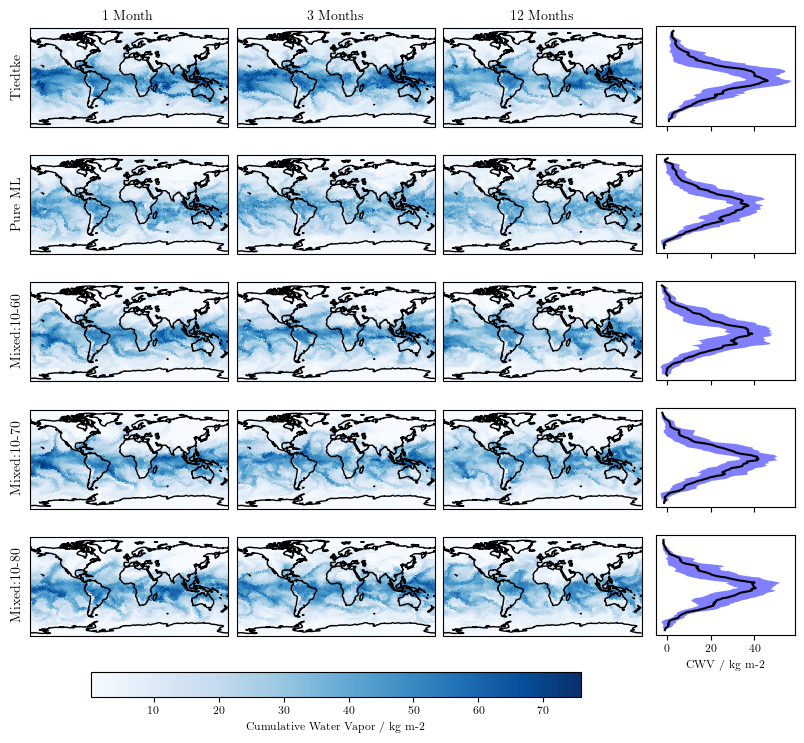

In [18]:
from tqdm.contrib import itertools
from matplotlib.gridspec import GridSpec
from convection_param.setup_mpl_tex import setup_mpl_tex, set_size 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import NullFormatter
from matplotlib import gridspec
from matplotlib.transforms import Bbox
from mpl_toolkits.axes_grid1 import make_axes_locatable

# trop_cap = 23.43615

setup_mpl_tex()

current_cmap = plt.get_cmap(name='Blues').copy()
current_cmap.set_bad(color='#bcb5bb')
qual_colormap = plt.get_cmap("tab10")

# figsize = list(set_size('textwidth'))
# # figsize[0] = figsize[0] / 4 * 3
# figsize[1] += 1.5

# figsize = list(set_size('textwidth'))
# figsize[0] = figsize[0] / 4 * 3
figsize=[6.4,4.8]
figsize[1] += 2.5
# figsize[0] *= 2
# figsize[1] *= 2

fig, geoaxes = plt.subplots(5,3,subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=figsize, constrained_layout=True)#(6.4*1,5.8*1))
# axes = []
# for i in range(5):
#     # geoaxes[i,-1].remove()
#     axes.append(fig.add_subplot(5,4,i*4+4), )
# fig, geoaxes = plt.subplots(5,3, figsize=figsize, constrained_layout=True)#(6.4*1,5.8*1))

# fig = plt.figure(figsize=figsize)
# gs = gridspec.GridSpec(5, 4, figure=fig, width_ratios=[1, 1, 1, 0.7])
# geoaxes = []
# axes = []
# for i in range(5):
#     for j in range(4):
#         if j < 3:
#             geoaxes.append(fig.add_subplot(gs[i,j], projection=ccrs.PlateCarree()))
#         else:
#             # axes.append(fig.add_subplot(gs[i,j], projection=ccrs.PlateCarree(), sharey=geoaxes[-1]))
#             axes.append(fig.add_subplot(gs[i,j]))
# geoaxes = np.array(geoaxes).reshape(5,3)

def sync_extents(ax_from, ax_to):
    ax_to.set_extent(ax_from.get_extent(crs=ccrs.PlateCarree()), crs=ccrs.PlateCarree())

clon = ds.clon.values
clat = ds.clat.values
clon_bnds = ds.clon_bnds.values
clat_bnds = ds.clat_bnds.values
clon_bnds = fix_periodicity_for_triplot(clon_bnds)
val_list = [ds.prw.values.squeeze() if ds != None else None for dss in ds_list for ds in dss]

zon_mean_std_list = [calc_zonal_mean_std(ds, 'prw') if ds != None else None for dss in ds_list for ds in dss]
# print(zon_mean_std_list)
max_zon_meanpstd = max([np.max(x[0]+x[1]) for x in zon_mean_std_list if x is not None])
print('Maximum zonal mean plus std: ', max_zon_meanpstd)
# glob_mean_std_list = [calc_global_mean_std(ds, 'prw') if ds != None else None for dss in ds_list for ds in dss]

# val_list = [(vals-ref_ds_list[i//5].prw.values.squeeze()) if vals is not None else None for i,vals in enumerate(val_list)]

min_val = max([np.min(vals) for vals in val_list if vals is not None])
max_val = max([np.max(vals) for vals in val_list if vals is not None])
print('Min val / Max val: ', min_val, max_val)

# sim_names_short = ['a)','b)','c)','d)','e)','f)','g']
# sim_names_short = ['ref','1.','2.','3.','4.']
# sim_names_short = ['Tiedtke','Pure ML','Mixed:10-60','Pure ML $\Delta R^2=0.2$','Mixed:10-60 $\Delta R^2=0.2$']
# sim_names_short = ['Tiedtke','Pure ML','Mixed:10-60','Pure ML\nw/ noise','Mixed:10-60\nw/ noise']
sim_names_short = ['Tiedtke','Pure ML','Mixed:10-60','Mixed:10-70','Mixed:10-80']

# ylims = []
titles = []
inset_list = []
k = 0
for i,j in itertools.product(range(5), range(3)):
    # ds = ds_list[i][j]
    vals = val_list[k]
    ax = geoaxes[i,j]
    
    # if vals is not None:
    # vals = (ds.rsdt - ds.rsut - ds.rlut).values.squeeze()
    # mapplot = ds_latlon_list[i][j].prw.plot(ax=ax, cmap='Blues', add_colorbar=False, vmin=min_val, vmax=max_val); ax.set_title('')
    mapplot = plot_icon_tricolor(ax,
                                 clon_bnds,
                                 clat_bnds,
                                 vals,
                                 cmap=current_cmap,
                                 vmin=min_val,
                                 vmax=max_val,
                                 rasterized=True)

    # ax.gridlines(draw_labels=False)
    # if 'troplat' in sim_names[i]:
    #     ax.axhline(-trop_cap, ls='--', c='orange', zorder=1, lw=1)
    #     ax.axhline(trop_cap, ls='--', c='orange', zorder=1, lw=1)
    if j==2:
        ax2=inset_axes(ax, width="100%", height="100%", 
             bbox_to_anchor=(1.1, 0.07, 0.7, 1),
             bbox_transform=ax.transAxes)
        
        # axpos = ax.get_position()
        # ax2 = fig.add_axes((axpos.x0,axpos.y0,(axpos.x1-axpos.x0),axpos.y1-axpos.y0), transform=fig.transFigure)
        # ax2 = fig.add_axes((1,0,0.5,0.5), transform=ax.transAxes)

        # # Get the position of the first axis
        # pos = ax.get_position()  # returns Bbox(x0, y0, x1, y1)
        # # Define new axis dimensions
        # width = pos.width / 2  # half the width of the first axis
        # height = pos.height / 2    # same height
        # x0 = pos.x1            # place it directly to the right of ax1
        # y0 = pos.y0
        # # Add the new axis
        # ax2 = fig.add_axes([x0, y0, width, height])

        # ax2 = axes[i]

        # divider = make_axes_locatable(ax)
        # ax2 = divider.append_axes("right", size="70%")  # half width, same height, flush right
        
        mean_prw, std_prw, lat = zon_mean_std_list[k]
        ax2.plot(mean_prw, lat*180/np.pi, color='black')
        ax2.fill_betweenx(lat*180/np.pi, mean_prw-std_prw, mean_prw+std_prw, facecolor='blue', alpha=0.5)
        ax2.set_yticks([])
        ax2.set_xlim(-5, max_zon_meanpstd*0.9)

        # # Force a draw so Cartopy finalizes layout
        # # fig.canvas.draw()
        # # Now query the actual renderer-adjusted position
        # renderer = fig.canvas.get_renderer()
        # bbox1 = ax.get_tightbbox(renderer)
        # # pos1 = ax.get_position()
        # pos2 = ax2.get_position()
        # # Copy height of ax1 onto ax2
        # ax2.set_position([pos2.x0, bbox1.y0, pos2.width, bbox1.height])

        # ax2.set_xlim(-90, 90)
        # ax2.set_ylabel('CWV / kg m-2', fontsize='x-small')
        # ax2.yaxis.tick_right(); ax2.yaxis.set_label_position("right")
        if i == 4:
            ax2.set_xlabel('CWV / kg m-2')
        else:
            ax2.set_xticklabels([])
            
        inset_list.append(ax2)
            
        # if 'troplat' in sim_names[i]:
        #     ax2.axhline(-trop_cap, ls='--', alpha=0.5, c='orange', zorder=1, lw=1)
        #     ax2.axhline(trop_cap, ls='--', alpha=0.5, c='orange', zorder=1, lw=1)
        
        # "detach" and add to figure
        # ax2.remove()
        # fig.add_axes(ax2)

    # else:
    #     mapplot = plot_icon_tricolor(ax,
    #                                  clon_bnds,
    #                                  clat_bnds,
    #                                  np.full_like(clon, np.nan),
    #                                  zorder=-1)
    if i==0:
        # title_obj = ax.set_title(f'{icon_time_to_date_time(ds_list[0][j].time.item())}', fontsize=10, zorder=1)
        title_obj = ax.set_title(f'{timesteps[j]+1} Month{"s" if timesteps[k]>0 else ""}', fontsize=10)
        titles.append(title_obj)
    if j==0:
        ax.text(x=-0.07, y=0.5, s=sim_names_short[i], rotation=90, ha='center', va='center', fontsize=10, transform=ax.transAxes)

    ax.coastlines()
    k += 1
    
fig.colorbar(mapplot, orientation='horizontal', ax=geoaxes.ravel().tolist(), shrink=0.8, label=r'Cumulative Water Vapor / kg m-2')#, pad=0.05)

# fig.subplots_adjust(right=0.6)
# figsize[0] += 0.5
# fig.set_size_inches(figsize[0], figsize[1])
# bbox = Bbox.from_bounds(0, 0, 6.4, 7.3)  
# renderer = fig.canvas.get_renderer()
# bbox = fig.get_tightbbox()
# print(bbox)
# print(fig.get_size_inches())
# fig.canvas.draw()
# fig = plt.gcf() # get current figure
# fig.set_size_inches(7.4,7.3)
# figure.set_size_inches(8, 6)
# for ax in geoaxes.ravel():
#     ax.set_rasterization_zorder(0)

# fig.savefig('Figures/CWV_comparison_zonalcol_150dpi.png', dpi=150, bbox_inches='tight')#, bbox_extra_artists=inset_list)#

# fig.savefig('Figures/CWV_comparison_zonalcol.pdf', dpi=100, bbox_inches='tight')#, bbox_extra_artists=inset_list)#
# fig.savefig('Figures/CWV_comparison_zonalcol.pdf', dpi=100, bbox_inches='tight')#, bbox_extra_artists=inset_list)#

plt.show()